In [7]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('wine.csv')

# 데이터 상위 5개 행 확인
print(df.head())

# 데이터 정보 및 결측치 확인
print(df.info())
print(df.isnull().sum())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------          

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# 1. 타깃 설정 (Wine → 0, 1, 2로 변환)
y = df['Wine'] - 1  # Wine 컬럼 값이 1,2,3이므로 → 0,1,2로 맞춤
X = df.drop('Wine', axis=1)

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
# ai_env 환경 안에 matplotlib 설치
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.9 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00a 0:00:01



📌 Decision Tree 정확도: 0.9444
              precision    recall  f1-score   support

           0     1.0000    0.9167    0.9565        12
           1     0.8750    1.0000    0.9333        14
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9444        36
   macro avg     0.9583    0.9389    0.9457        36
weighted avg     0.9514    0.9444    0.9450        36


📌 Random Forest 정확도: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36


📌 Bagging (Decision Tree) 정확도: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.000

/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ip

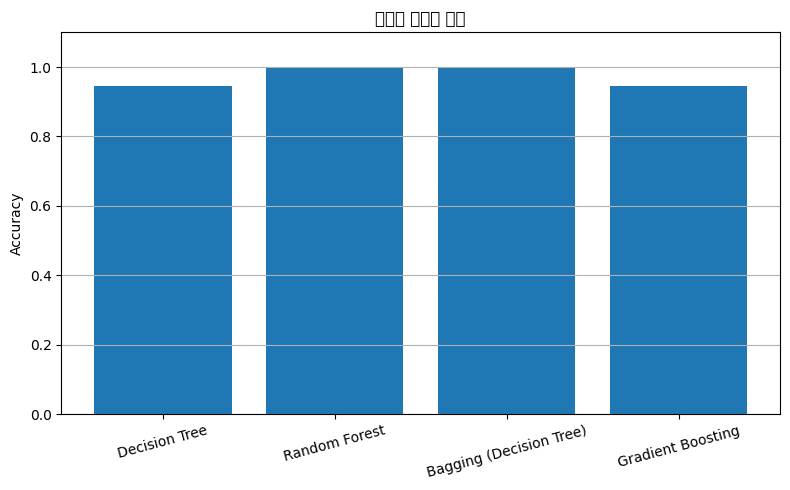

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('wine.csv')  # 경로는 실습 환경에 맞게 조정

# 2. 타깃/특성 분리
y = df['Wine'] - 1  # 클래스 1,2,3 → 0,1,2로 변환
X = df.drop('Wine', axis=1)

# 3. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Bagging (Decision Tree)": BaggingClassifier(  # 수정된 부분
        estimator=DecisionTreeClassifier(),         # ← base_estimator → estimator
        n_estimators=100,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# 6. 모델 학습 및 평가
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    
    print(f"\n📌 {name} 정확도: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

# 7. 정확도 시각화
plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.ylabel('Accuracy')
plt.title('모델별 정확도 비교')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 불러오기
df = pd.read_csv("wine.csv")  # 경로 수정 필요

# 2. 데이터 확인
print(df.head())
print(df.columns)

# 3. 레이블 분포 시각화
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()

print(df['label'].value_counts())

# 4. 결측치 확인 및 제거
print(df.isnull().sum())
df = df.dropna()

# 5. 히스토그램 시각화
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

# 6. pairplot으로 상관관계 확인
sns.pairplot(df, hue='label')
plt.show()

# 7. 박스플롯으로 이상치 확인 (첫 번째 특성 예시)
sns.boxplot(x='label', y=df.columns[1], data=df)
plt.title(df.columns[1])
plt.show()

# 8. 특성과 레이블 분리
X = df.drop('label', axis=1).values
y = df['label']
Y = pd.get_dummies(y).values  # One-hot encoding

# 9. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 10. 모델 정의
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(Y.shape[1], activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 11. 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# 12. 학습 결과 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 13. 성능 평가
y_pred = model.predict(X_test)
y_test_cls = np.argmax(y_test, axis=1)
y_pred_cls = np.argmax(y_pred, axis=1)

print(classification_report(y_test_cls, y_pred_cls))
print(confusion_matrix(y_test_cls, y_pred_cls))

ModuleNotFoundError: No module named 'tensorflow'

In [32]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [33]:
!pip install sns

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2639 sha256=1dbc9b13cae495347d6e4aa94d5998da702e9724c33e649e54a43b72567a11cb
  Stored in directory: /Users/chaejinseong/Library/Caches/pip/wheels/76/1a/47/c3b6a8b9d3ae47b1488f4be13c86586327c07e0ac1bb5b3337
Successfully built sns


In [34]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [35]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("wine.csv", index_col=0)
df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [4]:
df.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

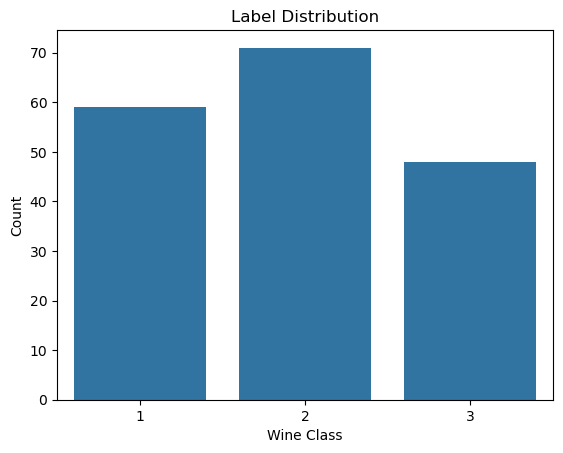

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="Wine")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

In [10]:
print(df.columns.tolist())

['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


In [11]:
df = pd.read_csv("wine.csv")  # ← index_col 제거!
print(df.columns)

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


In [12]:
df['Wine'].value_counts()


Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [13]:
df.isnull().sum()


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

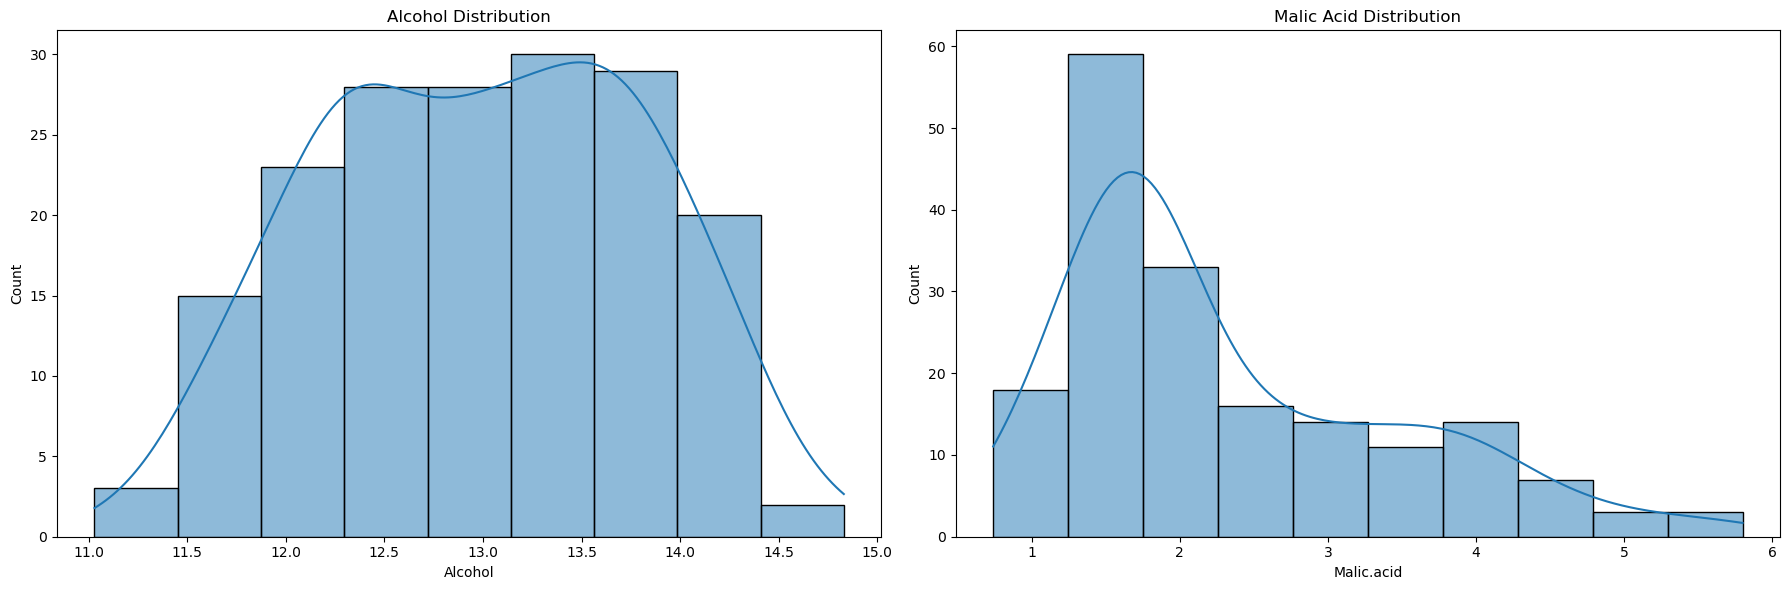

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
sns.histplot(df['Alcohol'], kde=True, ax=ax1)
plt.title("Alcohol Distribution")

ax2 = plt.subplot(1,2,2)
sns.histplot(df['Malic.acid'], kde=True, ax=ax2)
plt.title("Malic Acid Distribution")

plt.tight_layout()
plt.show()